<a href="https://colab.research.google.com/github/music-ai-644/AI_Study_2022/blob/main/Chapter3-4_pytorch_%EC%88%98%EC%97%85%EC%88%98%EC%A0%95%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3-4 선형 회귀를 위한 뉴런 만들기 

## 문제 해결을 위한 당뇨병 환자 데이터 준비
1. 데이터셋 불러오기 

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


2. 데이터셋 살펴보기

In [4]:
diabetes.data[:3]  # numpy 슬라이싱은 문서 참조 

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [5]:
diabetes.feature_names  # 나이(age) 성별(sex) 체질량지수(bmi) 혈압(bp), 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
x = diabetes.data[:, 2]  # 전체 샘플을 선택 (: 은 all의 의미) 하고 3번째 열(bmi)를 가져옴 
y = diabetes.target  # 혈당량 

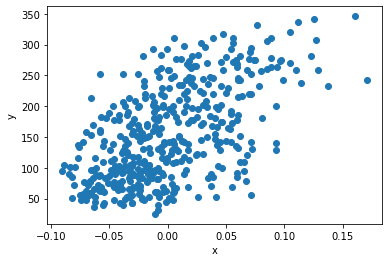

In [7]:
import matplotlib.pyplot as plt 
plt.scatter (x, y) 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
# Step1 torch 라이브러리 가져오기 
import torch 
import torch.nn as nn

In [9]:
# Step2 model 정의 
model = nn.Linear(1, 1)  # 입력 변수가 1차원, 출력 변수가 1차원 이라는 뜻

In [12]:
print(model.weight)  # w
print(model.bias)  # b

Parameter containing:
tensor([[-0.2048]], requires_grad=True)
Parameter containing:
tensor([-0.4603], requires_grad=True)


In [14]:
a_value = torch.FloatTensor([1.])
print(model(a_value))  # model.foward(a_value)
print(model.weight * a_value + model.bias)

tensor([-0.6651], grad_fn=<AddBackward0>)
tensor([[-0.6651]], grad_fn=<AddBackward0>)


In [16]:
#Step3 loss 정의
loss = nn.L1Loss()

In [18]:
a = torch.FloatTensor([1.])
b = torch.FloatTensor([2.])

In [20]:
loss(b, a)

tensor(1.)

In [22]:
#Step4 optimizer 설정 
optim = torch.optim.Adam(model.parameters(), lr=1e-3)

In [23]:
for x_i, y_i in zip(x, y):
  x_i = torch.FloatTensor([x_i])
  y_i = torch.FloatTensor([y_i])

  # model의 미분값 초기화 
  model.zero_grad() 
  optim.zero_grad() 

  # 예측 
  y_hat = model(x_i) 
  
  # 오차 계산
  err = loss(y_hat, y_i)
  
  # 미분값 계산
  err.backward()

  # 미분값이 모델에 적용 (w, b 가 업데이트)
  optim.step()

Text(0, 0.5, 'y')

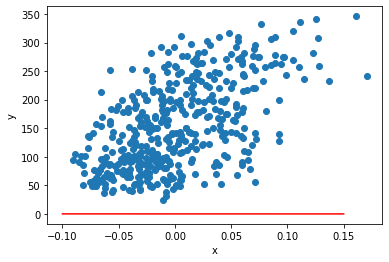

In [26]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * model.weight.data.numpy()[0] + model.bias.data.numpy()[0])
pt2 = (0.15, 0.15 * model.weight.data.numpy()[0] + model.bias.data.numpy()[0])
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('x')
plt.ylabel('y')